In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
butterfly = mpimg.imread("butterfly.jpg")

In [3]:
butterfly.shape

(356, 493, 3)

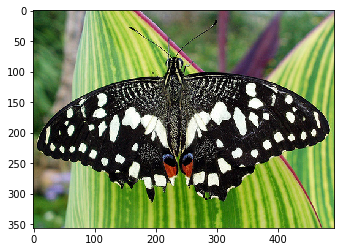

In [4]:
plt.imshow(butterfly)
plt.show()

In [5]:
print(butterfly)

[[[ 61  87  50]
  [ 55  91  53]
  [ 46  88  52]
  ...
  [142 162 171]
  [154 152 163]
  [157 155 166]]

 [[ 56  86  50]
  [ 48  84  48]
  [ 47  84  50]
  ...
  [146 152 174]
  [166 148 172]
  [169 151 175]]

 [[ 58  96  59]
  [ 55  89  54]
  [ 44  78  45]
  ...
  [151 145 173]
  [172 146 173]
  [175 149 176]]

 ...

 [[ 53 125  41]
  [ 55 124  44]
  [ 58 124  52]
  ...
  [216 218 108]
  [201 218 112]
  [187 204  98]]

 [[ 60 119  37]
  [ 58 121  40]
  [ 59 121  48]
  ...
  [218 217  99]
  [206 219 101]
  [194 207  89]]

 [[ 62 128  40]
  [ 58 130  44]
  [ 55 129  50]
  ...
  [223 218 101]
  [212 220 108]
  [202 210  98]]]


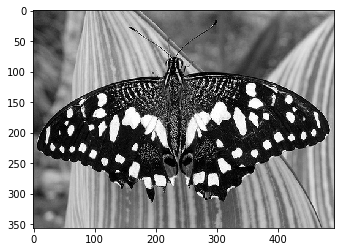

In [6]:
gray_scale_butterfly = np.dot(butterfly[..., :3], [0.299, 0.587, 0.114])
plt.imshow(gray_scale_butterfly, cmap="gray")
plt.show()

In [7]:
gray_scale_butterfly.shape

(356, 493)

In [8]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
np.pad(a, ((2, 2), (2, 2)), 'constant', constant_values=((1, 3), (7, 9)))

array([[7, 7, 1, 1, 1, 9, 9],
       [7, 7, 1, 1, 1, 9, 9],
       [7, 7, 1, 2, 3, 9, 9],
       [7, 7, 4, 5, 6, 9, 9],
       [7, 7, 7, 8, 9, 9, 9],
       [7, 7, 3, 3, 3, 9, 9],
       [7, 7, 3, 3, 3, 9, 9]])

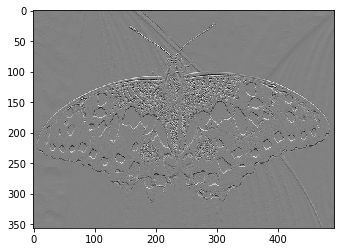

In [9]:
horizontal_edges = gray_scale_butterfly - np.pad(gray_scale_butterfly[1:, :], ((0, 1), (0, 0)), 'edge')
plt.imshow(horizontal_edges, cmap="gray")
plt.show()

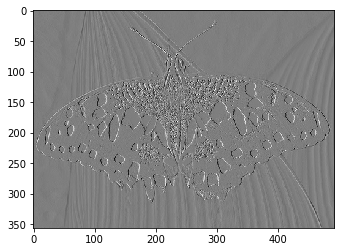

In [10]:
vertical_edges = gray_scale_butterfly - np.pad(gray_scale_butterfly[:, 1:], ((0, 0), (0, 1)), 'edge')
plt.imshow(vertical_edges, cmap="gray")
plt.show()

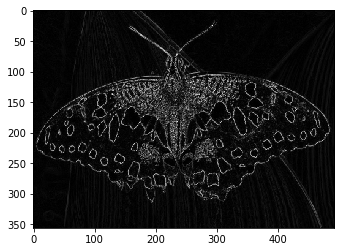

In [11]:
gradients = np.sqrt(np.square(vertical_edges)+np.square(horizontal_edges))
plt.imshow(gradients, cmap="gray")
plt.show()

In [14]:
def Gaussian_filter(n, sigma):
    gaus_filter = np.array([range(-n//2+1, n//2+1, 1) for _ in range(n)])
    gaus_filter = np.square(gaus_filter) + np.square(gaus_filter.T)
    gaus_filter = (1/(2*np.pi*np.square(sigma)))*np.exp(-gaus_filter/(2*np.square(sigma)))
    return gaus_filter

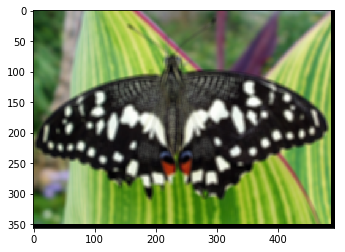

In [20]:
smooth_butterfly = np.zeros(butterfly.shape)
n = 7
gaus_filter = Gaussian_filter(n, 100)
for i in range(butterfly.shape[0] - n):
    for j in range(butterfly.shape[1] - n):
        smooth_butterfly[i, j, 0] = (butterfly[i:i+n, j:j+n, 0]*gaus_filter).sum()
        smooth_butterfly[i, j, 1] = (butterfly[i:i+n, j:j+n, 1]*gaus_filter).sum()
        smooth_butterfly[i, j, 2] = (butterfly[i:i+n, j:j+n, 2]*gaus_filter).sum()
plt.imshow(smooth_butterfly/np.max(smooth_butterfly))
plt.show()